<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

# Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import evaluation
import _pickle as cPickle

# Load data

In [2]:
data_dir = "./data/"  + "dataset/"

MFCC_LEN_LIM = 700
N_MFCC = 13
FOLDS = 10

In [8]:
def load_data(from_fold, to_fold):
    X = []
    y = []
    for fold in range(from_fold, to_fold + 1):
        with open(data_dir + f"data_mfcc_{fold}.pkl", 'rb') as f:
            data_mfcc = cPickle.load(f)

        for i in range(len(data_mfcc['sentence_I'])):
            if data_mfcc['sentence_I'][i].shape[0] < MFCC_LEN_LIM:
                sentence_I = np.zeros((MFCC_LEN_LIM, N_MFCC), dtype=np.float32)
                sentence_I[-data_mfcc['sentence_I'][i].shape[0]:] = data_mfcc['sentence_I'][i]
            else:
                sentence_I = data_mfcc['sentence_I'][i]
                
            if data_mfcc['sentence_II'][i].shape[0] < MFCC_LEN_LIM:
                sentence_II = np.zeros((MFCC_LEN_LIM, N_MFCC), dtype=np.float32)
                sentence_II[-data_mfcc['sentence_II'][i].shape[0]:] = data_mfcc['sentence_II'][i]
            else:
                sentence_II = data_mfcc['sentence_II'][i]
            X.append([sentence_I, sentence_II])
            y.append(data_mfcc['same_speaker'][i])
    return np.array(X), np.array(y)

In [3]:
X_train, y_train = load_data(0, FOLDS - 1)
X_train.shape

(100000, 2, 700, 13)

In [4]:
np.save(data_dir + "data_mfcc_x.npy", X_train)
np.save(data_dir + "data_mfcc_y.npy", y_train)

In [3]:
X_train = np.load(data_dir + "data_mfcc_x.npy")
y_train = np.load(data_dir + "data_mfcc_y.npy")

# Train model

In [4]:
from modeling.gru_gru import GRU_GRU

model = GRU_GRU(num_features=N_MFCC)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 13)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 13)]   0                                            
__________________________________________________________________________________________________
gru (GRU)                       (None, None, 64)     15168       input_1[0][0]                    
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, None, 64)     15168       input_2[0][0]                    
_______________________________________________________________________________________

In [19]:
model.fit(X_train, y_train, epochs=100, early_stopping_rounds=7)

Epoch 1/100
2532/2532 [==============================] - 230s 91ms/step - loss: 0.5275 - acc: 0.7308 - val_loss: 0.3477 - val_acc: 0.8546
Epoch 2/100
2532/2532 [==============================] - 227s 90ms/step - loss: 0.3220 - acc: 0.8694 - val_loss: 0.2485 - val_acc: 0.9023
Epoch 3/100
2532/2532 [==============================] - 227s 90ms/step - loss: 0.2578 - acc: 0.9010 - val_loss: 0.2097 - val_acc: 0.9229
Epoch 4/100
2532/2532 [==============================] - 223s 88ms/step - loss: 0.2166 - acc: 0.9189 - val_loss: 0.1766 - val_acc: 0.9370
Epoch 5/100
2532/2532 [==============================] - 223s 88ms/step - loss: 0.1853 - acc: 0.9322 - val_loss: 0.1559 - val_acc: 0.9440
Epoch 6/100
2532/2532 [==============================] - 223s 88ms/step - loss: 0.1662 - acc: 0.9402 - val_loss: 0.1366 - val_acc: 0.9496
Epoch 7/100
2532/2532 [==============================] - 223s 88ms/step - loss: 0.1510 - acc: 0.9467 - val_loss: 0.1195 - val_acc: 0.9588
Epoch 8/100
2532/2532 [===========

KeyboardInterrupt: 

In [ ]:
model.save_weights()

In [5]:
# Continue training
model.load_weights()
model.fit(X_train, y_train, epochs=100, early_stopping_rounds=7)

Epoch 1/100
2813/2813 [==============================] - 258s 92ms/step - loss: 0.0580 - acc: 0.9814 - val_loss: 0.0410 - val_acc: 0.9861
Epoch 2/100
2813/2813 [==============================] - 242s 86ms/step - loss: 0.0499 - acc: 0.9841 - val_loss: 0.0284 - val_acc: 0.9904
Epoch 3/100
2813/2813 [==============================] - 245s 87ms/step - loss: 0.0459 - acc: 0.9850 - val_loss: 0.0375 - val_acc: 0.9896
Epoch 4/100
2813/2813 [==============================] - 244s 87ms/step - loss: 0.0425 - acc: 0.9861 - val_loss: 0.0269 - val_acc: 0.9915
Epoch 5/100
2813/2813 [==============================] - 244s 87ms/step - loss: 0.0442 - acc: 0.9858 - val_loss: 0.0252 - val_acc: 0.9910
Epoch 6/100
2813/2813 [==============================] - 246s 87ms/step - loss: 0.0458 - acc: 0.9849 - val_loss: 0.0263 - val_acc: 0.9912
Epoch 7/100
2813/2813 [==============================] - 236s 84ms/step - loss: 0.0413 - acc: 0.9868 - val_loss: 0.0337 - val_acc: 0.9895
Epoch 8/100
2813/2813 [===========

In [6]:
model.save_weights()

# Evaluation

In [11]:
model.load_weights()

In [9]:
X_test, y_test = load_data(10, 10)

In [10]:
y_pred = model.predict(X_test)

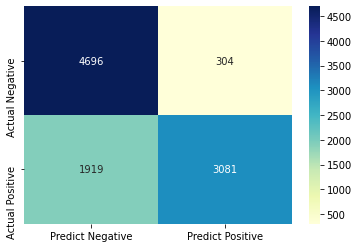

In [11]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [12]:
evaluation.print_classification_report(y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

       False       0.71      0.94      0.81      5000
        True       0.91      0.62      0.73      5000

    accuracy                           0.78     10000
   macro avg       0.81      0.78      0.77     10000
weighted avg       0.81      0.78      0.77     10000



In [17]:
evaluation.get_f1_score(y_test, y_pred, average='micro')

0.7777